In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import sklearn
#PLOTS libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams

#interface for drawing attractive and informative statistical graphics.
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

#Validador cruzado de permutación aleatoria
#Produce índices para dividir los datos en conjuntos de entrenamiento y pruebas.
from sklearn.model_selection import ShuffleSplit


In [2]:
# Load the Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()

print('KEYS : ')
print(boston.keys())
#['data'] #arreglo con renglones y mediciones //caracteristicas
#['target'] #precios
print('FEATURE NAMES : ')
print(boston['feature_names'])
print('SHAPE : ')
print(boston.data.shape)

print(boston.DESCR)

KEYS : 
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
FEATURE NAMES : 
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
SHAPE : 
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS  

In [3]:

#DataFramw with Pandas
DF = pd.DataFrame(boston.data)
#Column Names Assigment
DF.columns = boston.feature_names


#Adding the price column
DF['MEDV'] = boston.target
print(DF.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
# iS MISSING ANY VALUES?
DF.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
#print(DF.describe())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


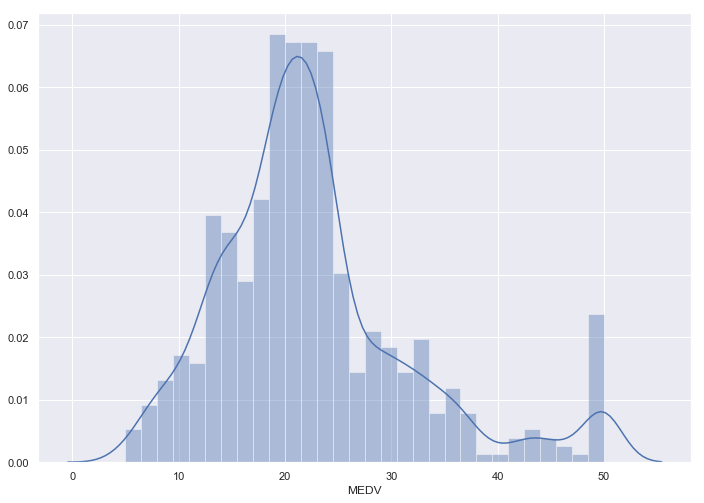

In [6]:
#Exploratory Data Analysis
#Distribution of MEDIAN VALUE PRICES - Histogram
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(DF['MEDV'], bins=30)
plt.show()

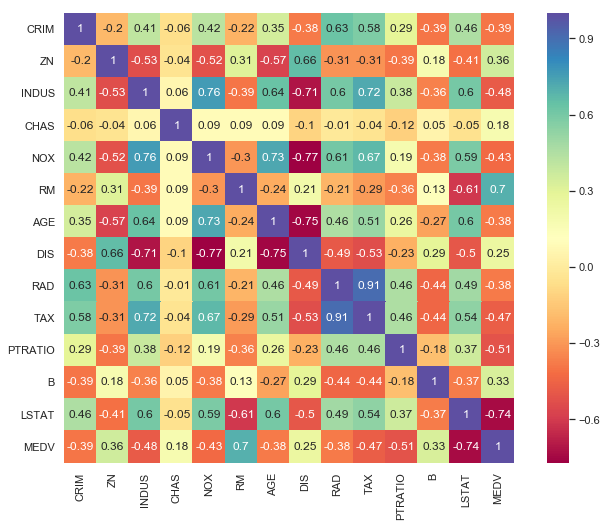

In [7]:
# Calculate and show correlation matrix
correlation_matrix = DF.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,
           #center=0,
            #cmap="OrRd",
            cmap="Spectral",
           square=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


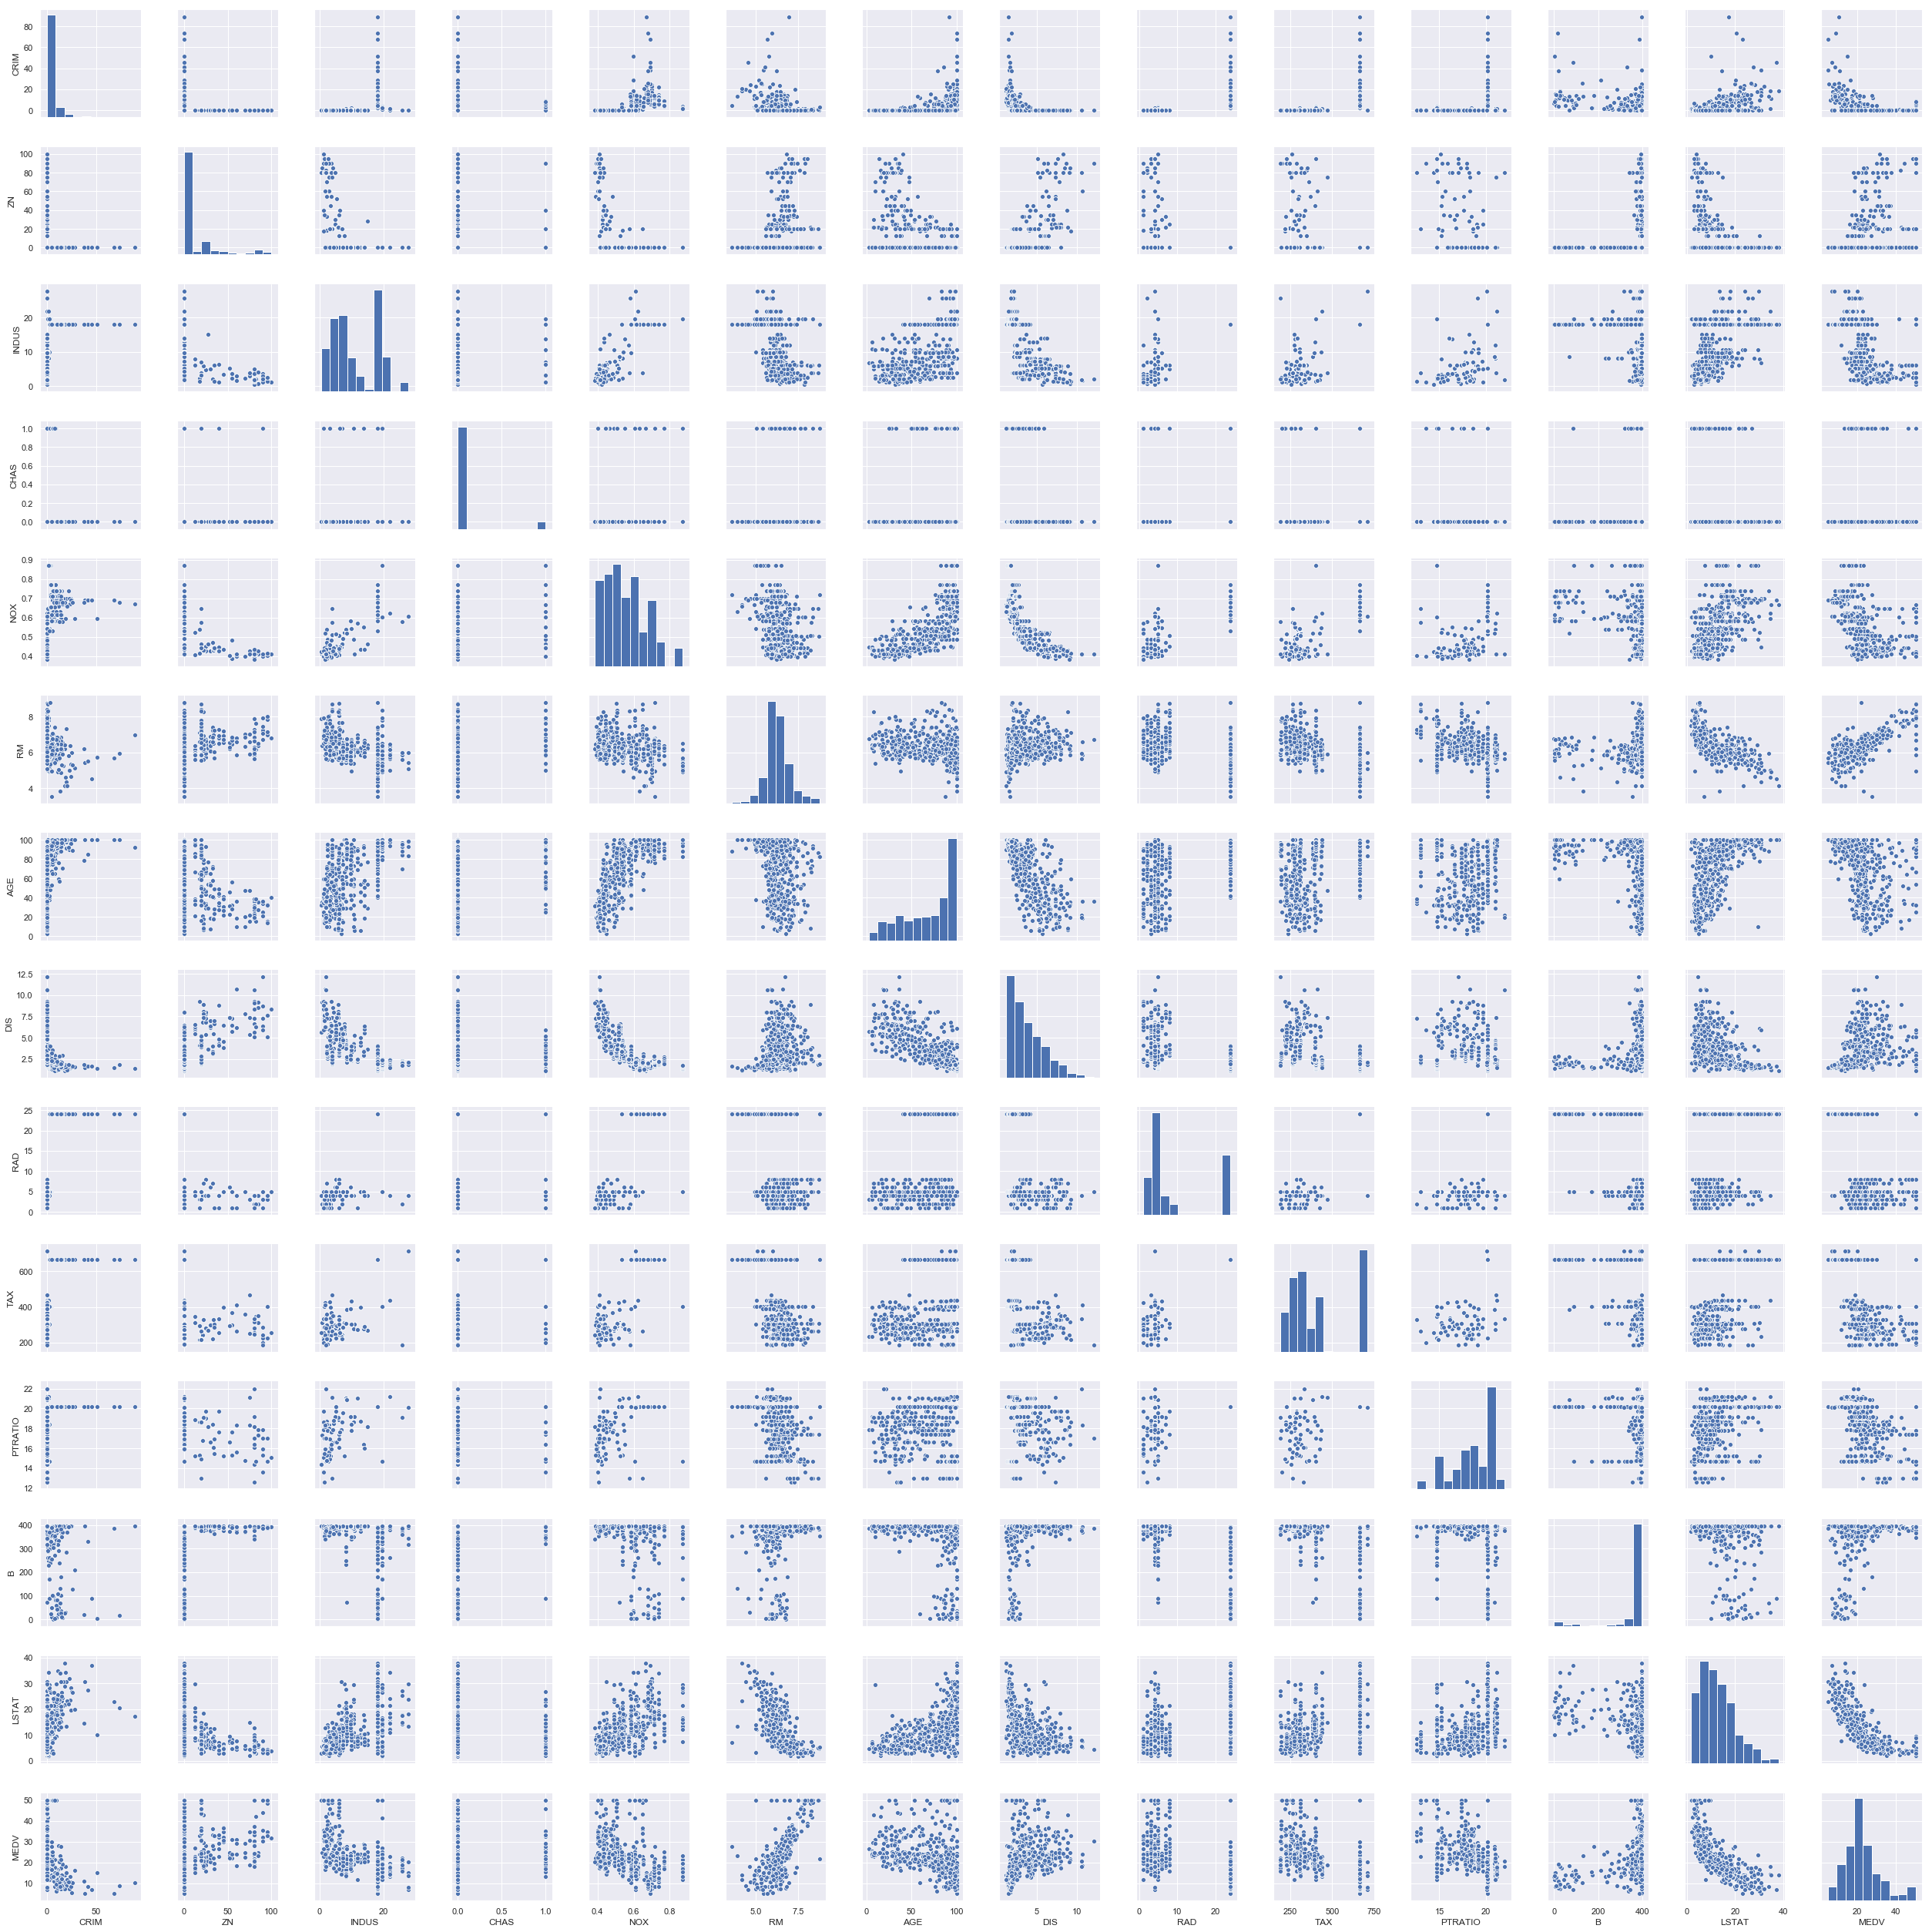

In [8]:

# Calculate and show pairplot
#De forma predeterminada, esta función creará una cuadrícula de Ejes de tal manera que cada variable datase compartirá en el eje y en una sola fila y en el eje x en una sola columna. 
sns.pairplot(DF, size=2.5)
plt.tight_layout()


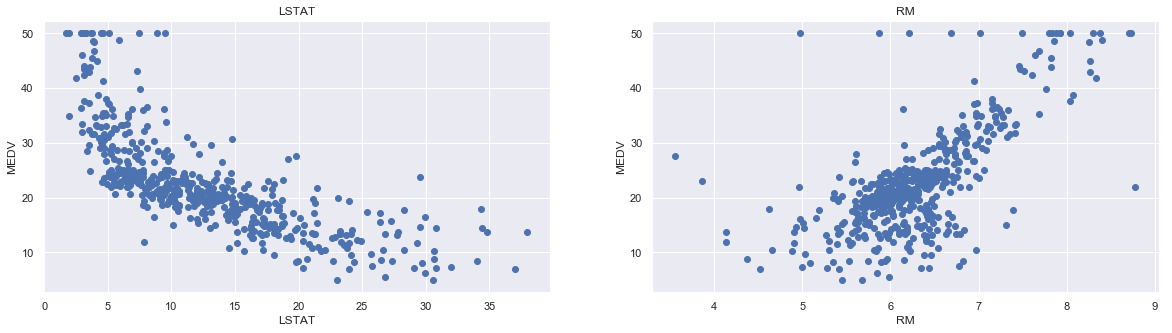

In [9]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = DF['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = DF[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [6]:
#Statistics

# Minimum price of the data
minimum_price = np.amin(prices)
# Maximum price of the data
maximum_price = np.amax(prices)
# Mean price of the data
mean_price = np.mean(prices)
# Median price of the data
median_price = np.median(prices)
# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


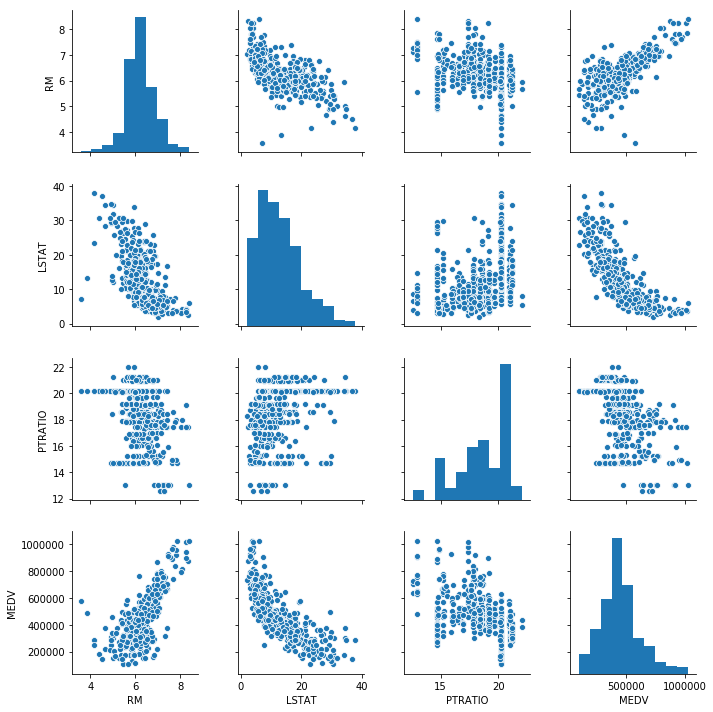

In [7]:

# Calculate and show pairplot
#De forma predeterminada, esta función creará una cuadrícula de Ejes de tal manera que cada variable datase compartirá en el eje y en una sola fila y en el eje x en una sola columna. 
sns.pairplot(data, size=2.5)
plt.tight_layout()


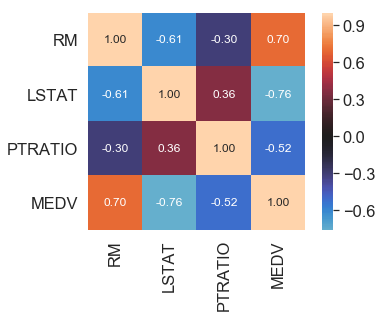

In [8]:
# Calculate and show correlation matrix
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                center=0,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 12},
                yticklabels=['RM', 'LSTAT', 'PTRATIO', 'MEDV'],
                xticklabels=['RM', 'LSTAT', 'PTRATIO', 'MEDV'])

In [9]:
# Import 'r2_score'
#coeficiente de determinacion R 
#sirve para determinar que tan bueno es un modelo

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [10]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [11]:
len(X_train)

391

In [12]:
len(X_test)

98

In [13]:
# Produce learning curves for varying training set sizes and maximum depths
#vs.ModelLearning(features, prices)

In [14]:
#param_grid = [ {‘C’: [1, 10, 100, 1000], ‘kernel’: [‘linear’]}, {‘C’: [1, 10, 100, 1000], ‘gamma’: [0.001, 0.0001], ‘kernel’: [‘rbf’]}, ]

In [15]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [16]:

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [17]:

# Produce a matrix for client data
#client_data = [[6.575, 4.98, 15.3]]  # Client 3
#client_data = [[6.421, 9.14, 17.8]]  # Client 3
client_data = [[7.185, 4.03, 17.8]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    
    
#    	RM	LSTAT	PTRATIO	MEDV
#0	6.575	4.98	15.3	504000.0
#1	6.421	9.14	17.8	453600.0
#2	7.185	4.03	17.8	728700.0-

Predicted selling price for Client 1's home: $725,494.74


In [18]:

# Produce a matrix for client data
client_data = [ # Client 1
               [6.421, 9.14, 17.8], # Client 2
               [7.185, 4.03, 17.8]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    
    
    
    
    


Predicted selling price for Client 1's home: $504,550.00
Predicted selling price for Client 2's home: $725,494.74


In [19]:
vs.PredictTrials(features, prices, fit_model, client_data)

0.7731335857130197
Trial 1: $501,352.17
0.7878793627100612
Trial 2: $464,562.00
0.8180246155248073
Trial 3: $437,966.67
0.7965112514106062
Trial 4: $471,848.28
0.7850489648229628
Trial 5: $488,400.00
0.854643747656155
Trial 6: $510,072.97
0.6807858499776179
Trial 7: $431,953.85
0.8270583434689891
Trial 8: $436,522.06
0.8300388857409896
Trial 9: $477,514.93
0.8286092236109541
Trial 10: $501,238.89

Range in prices: $78,119.13


In [55]:
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

SyntaxError: invalid syntax (<ipython-input-55-81bab8c404e9>, line 1)

In [56]:
https://github.com/rromanss23/Machine_Leaning_Engineer_Udacity_NanoDegree/blob/master/projects/boston_housing/boston_housing.ipynb

SyntaxError: invalid syntax (<ipython-input-56-bf23803cdef2>, line 1)

In [ ]:
boston=load_boston()

print(boston.keys())
datos=boston['data'] #arreglo con renglones y mediciones //caracteristicas
targets_names=boston['target']
desciption=boston['DESCR']
features_names=boston['feature_names']
file_name=boston['filename']

In [19]:
# print("DATOS");print(datos)
# print("TARGETS");print(targets_names)
# print("TARGET NAMES");print(targets_names)
print("DESCRIPTION");print(desciption)
print("FEATURES NAMES");print(features_names)
print("FILE NAME");print(file_name)


DESCRIPTION
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        -

In [9]:
X_train, X_test, y_train, y_test = train_test_split(boston['data'],boston['target'])
print(X_train.shape);print(X_test.shape)

(379, 13)
(127, 13)


In [12]:

'''KNNEIGHBOR REGRESSION'''
knn= KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)	#que tan bien aprendio el algoritmo
print(knn.score(X_test,y_test))
#print(knn.predict([[1.2,3.4,5.6,1.1]])	)		#a que clasificacion pertenecesn

0.3423493912484781


In [13]:

'''LINEAR REGRESSION'''
rl=LinearRegression()
rl.fit(X_train,y_train)
rl.score(X_test,y_test)
print(rl.score(X_test,y_test))

0.5625354616687687


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [14]:
'''RIDGE'''
ridge=Ridge(alpha=0.2)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)
print(ridge.score(X_test,y_test))


0.5606432261483114


In [ ]:
https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

In [ ]:
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155